In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import requests
import bs4
%matplotlib inline
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import sys
reload(sys)
import csv
sys.setdefaultencoding('utf8')
#matplotlib.style.use('ggplot') 

In [103]:
stocksdf = pd.read_csv('IPOs.csv')
stocksdf.columns=([u'Name', u'Ticker', u'Underwriter', u'# Shares(M)', u'IPO Year Close',
       u'Offer Price', u'Gain', u'IPO Date'])
stocksdf.head()

,Name,Ticker,Underwriter,# Shares(M),IPO Year Close,Offer Price,Gain,IPO Date
0,Atlassian Corporation Plc,TEAM,Goldman Sachs,22.0,30.21,21.0,43.86%,12/10/15
1,"Duluth Holdings, Inc.",DLTH,William Blair,6.7,14.57,12.0,21.42%,11/20/15
2,"Square, Inc.",SQ,Goldman Sachs,27.0,12.78,9.0,42.00%,11/19/15
3,Mimecast Ltd.,MIME,Goldman Sachs,7.8,9.64,10.0,-3.60%,11/19/15
4,"Match Group, Inc.",MTCH,J.P. Morgan,33.3,13.6,12.0,13.33%,11/19/15


In [104]:
stocksdf.shape

(1334, 8)

In [4]:
url_template = 'http://www.nasdaq.com/symbol/{}/real-time'
results3 = []
results4 = []
resultsdict = {}
    
def sectorscrape(soupy):
    sec = soupy.findAll(id="qbar_sectorLabel")
    sector = []
    for i in sec:
        try:
            sector.append(i.text.strip())
        except:
            pass

    return sector


for start in list(stocksdf.Ticker):
    response = requests.get(url_template.format(start))
    page = response.text
    soup = BeautifulSoup(page,'lxml')
    theresponse = sectorscrape(soup)
    results3.append(str(start)+": "+str(theresponse))
    resultsdict.update({start:theresponse})

In [105]:
industrydf = pd.DataFrame()
for i in range(len(results3)):
    industrydf[i] = [results3[i],results3[i][:results3[i].find(":")],results3[i][results3[i].find("y: ")+3:-2]]

In [106]:
industrydf = industrydf.T
industrydf.columns = (['Result','Ticker','Industry'])

In [107]:
industrydf['Industry'] = industrydf.Industry.apply(lambda x: np.nan if ":" in x else x)

In [108]:
#industrydf = industrydf.dropna()
stocksdf = pd.merge(stocksdf, industrydf, on='Ticker', how='left')

In [109]:
stocksdf.head(50)

,Name,Ticker,Underwriter,# Shares(M),IPO Year Close,Offer Price,Gain,IPO Date,Result,Industry
0,Atlassian Corporation Plc,TEAM,Goldman Sachs,22.0,30.21,21.00,43.86%,12/10/15,TEAM: [u'Industry: Technology'],Technology
1,"Duluth Holdings, Inc.",DLTH,William Blair,6.7,14.57,12.00,21.42%,11/20/15,DLTH: [u'Industry: Consumer Services'],Consumer Services
2,"Square, Inc.",SQ,Goldman Sachs,27.0,12.78,9.00,42.00%,11/19/15,SQ: [u'Industry: Technology'],Technology
3,Mimecast Ltd.,MIME,Goldman Sachs,7.8,9.64,10.00,-3.60%,11/19/15,MIME: [u'Industry: Technology'],Technology
4,"Match Group, Inc.",MTCH,J.P. Morgan,33.3,13.6,12.00,13.33%,11/19/15,MTCH: [u'Industry: Technology'],Technology
5,"Axsome Therapeutics, Inc.",AXSM,Ladenburg Thalmann,5.7,9.2,9.00,2.22%,11/19/15,AXSM: [u'Industry: Health Care'],Health Care
6,"Xtera Communications, Inc.",XCOM,Needham & Company,5.0,4.21,5.00,-15.80%,11/13/15,XCOM: [u'Industry: Public Utilities'],Public Utilities
7,"Instructure, Inc.",INST,Morgan Stanley,4.4,20.92,16.00,30.75%,11/13/15,INST: [u'Industry: Technology'],Technology
8,Advanced Accelerator Applications S.A.,AAAP,Citigroup,4.7,30.04,16.00,87.75%,11/11/15,AAAP: [u'Industry: Health Care'],Health Care
9,Wave Life Sciences Pte Ltd.,WVE,Jefferies,6.4,15.02,16.00,-6.13%,11/11/15,WVE: [u'Industry: Health Care'],Health Care


In [110]:
del stocksdf['Result']

In [111]:
stocksdf.to_csv('stocksdf.csv')

In [112]:
stocksdf.head()

,Name,Ticker,Underwriter,# Shares(M),IPO Year Close,Offer Price,Gain,IPO Date,Industry
0,Atlassian Corporation Plc,TEAM,Goldman Sachs,22.0,30.21,21.0,43.86%,12/10/15,Technology
1,"Duluth Holdings, Inc.",DLTH,William Blair,6.7,14.57,12.0,21.42%,11/20/15,Consumer Services
2,"Square, Inc.",SQ,Goldman Sachs,27.0,12.78,9.0,42.00%,11/19/15,Technology
3,Mimecast Ltd.,MIME,Goldman Sachs,7.8,9.64,10.0,-3.60%,11/19/15,Technology
4,"Match Group, Inc.",MTCH,J.P. Morgan,33.3,13.6,12.0,13.33%,11/19/15,Technology


In [113]:
import pandas_datareader.data as web
import datetime
from datetime import timedelta
from pandas.tseries.offsets import BDay

In [114]:
stocksdf['1d'] = stocksdf['IPO Date'].apply(lambda x: pd.to_datetime(x) + timedelta(1))
stocksdf['7d'] = stocksdf['IPO Date'].apply(lambda x: pd.to_datetime(x) + timedelta(7))
stocksdf['30d'] = stocksdf['IPO Date'].apply(lambda x: pd.to_datetime(x) + timedelta(30))
stocksdf['60d'] = stocksdf['IPO Date'].apply(lambda x: pd.to_datetime(x) + timedelta(60))
stocksdf['90d'] = stocksdf['IPO Date'].apply(lambda x: pd.to_datetime(x) + timedelta(90))
stocksdf['180d'] = stocksdf['IPO Date'].apply(lambda x: pd.to_datetime(x) + timedelta(180))

In [115]:
stocksdfhead = stocksdf.head(5)

In [119]:
mylist = []
def pricelookup(date,ticker):
    for i in range(5):
        try:
            start = datetime.datetime(date.year, date.month,(date.day)+i)
            a = web.DataReader(ticker, 'yahoo',start,start)
            return a.Close[0]
        except:
            pass
    return np.nan

stocksdfhead['1day'] = stocksdfhead.apply(lambda row: pricelookup(row['1d'], row['Ticker']), axis=1)
stocksdfhead['7days'] = stocksdfhead.apply(lambda row: pricelookup(row['7d'], row['Ticker']), axis=1)
stocksdfhead['30days'] = stocksdfhead.apply(lambda row: pricelookup(row['30d'], row['Ticker']), axis=1)
stocksdfhead['60days'] = stocksdfhead.apply(lambda row: pricelookup(row['60d'], row['Ticker']), axis=1)
stocksdfhead['90days'] = stocksdfhead.apply(lambda row: pricelookup(row['90d'], row['Ticker']), axis=1)
stocksdfhead['180days'] = stocksdfhead.apply(lambda row: pricelookup(row['180d'], row['Ticker']), axis=1)

In [122]:
stocksdfhead

,Name,Ticker,Underwriter,# Shares(M),IPO Year Close,Offer Price,Gain,IPO Date,Industry,1d,...,30d,60d,90d,180d,1day,7days,30days,60days,90days,180days
0,Atlassian Corporation Plc,TEAM,Goldman Sachs,22.0,30.21,21.0,43.86%,12/10/15,Technology,2015-12-11,...,2016-01-09,2016-02-08,2016-03-09,2016-06-07,27.50,28.01,27.120001,17.92,21.77,23.459999
1,"Duluth Holdings, Inc.",DLTH,William Blair,6.7,14.57,12.0,21.42%,11/20/15,Consumer Services,2015-11-21,...,2015-12-20,2016-01-19,2016-02-18,2016-05-18,14.16,14.21,14.690000,14.08,16.18,22.059999
2,"Square, Inc.",SQ,Goldman Sachs,27.0,12.78,9.0,42.00%,11/19/15,Technology,2015-11-20,...,2015-12-19,2016-01-18,2016-02-17,2016-05-17,12.85,12.05,12.240000,9.47,9.84,9.180000
3,Mimecast Ltd.,MIME,Goldman Sachs,7.8,9.64,10.0,-3.60%,11/19/15,Technology,2015-11-20,...,2015-12-19,2016-01-18,2016-02-17,2016-05-17,10.15,10.07,9.890000,7.72,9.49,8.000000
4,"Match Group, Inc.",MTCH,J.P. Morgan,33.3,13.6,12.0,13.33%,11/19/15,Technology,2015-11-20,...,2015-12-19,2016-01-18,2016-02-17,2016-05-17,15.20,14.62,13.900000,12.51,10.11,14.490000


In [121]:
mylist = []
def pricelookup(date,ticker):
    for i in range(5):
        try:
            start = datetime.datetime(date.year, date.month,(date.day)+i)
            a = web.DataReader(ticker, 'yahoo',start,start)
            return a.Close[0]
        except:
            pass
    return np.nan

stocksdf['1day'] = stocksdf.apply(lambda row: pricelookup(row['1d'], row['Ticker']), axis=1)
stocksdf['7days'] = stocksdf.apply(lambda row: pricelookup(row['7d'], row['Ticker']), axis=1)
stocksdf['30days'] = stocksdf.apply(lambda row: pricelookup(row['30d'], row['Ticker']), axis=1)
stocksdf['60days'] = stocksdf.apply(lambda row: pricelookup(row['60d'], row['Ticker']), axis=1)
stocksdf['90days'] = stocksdf.apply(lambda row: pricelookup(row['90d'], row['Ticker']), axis=1)
stocksdf['180days'] = stocksdf.apply(lambda row: pricelookup(row['180d'], row['Ticker']), axis=1)

In [123]:
stocksdf

,Name,Ticker,Underwriter,# Shares(M),IPO Year Close,Offer Price,Gain,IPO Date,Industry,1d,...,30d,60d,90d,180d,1day,7days,30days,60days,90days,180days
0,Atlassian Corporation Plc,TEAM,Goldman Sachs,22.00,30.21,21.0,43.86%,12/10/15,Technology,2015-12-11,...,2016-01-09,2016-02-08,2016-03-09,2016-06-07,27.500000,28.010000,27.120001,17.920000,21.770000,23.459999
1,"Duluth Holdings, Inc.",DLTH,William Blair,6.70,14.57,12.0,21.42%,11/20/15,Consumer Services,2015-11-21,...,2015-12-20,2016-01-19,2016-02-18,2016-05-18,14.160000,14.210000,14.690000,14.080000,16.180000,22.059999
2,"Square, Inc.",SQ,Goldman Sachs,27.00,12.78,9.0,42.00%,11/19/15,Technology,2015-11-20,...,2015-12-19,2016-01-18,2016-02-17,2016-05-17,12.850000,12.050000,12.240000,9.470000,9.840000,9.180000
3,Mimecast Ltd.,MIME,Goldman Sachs,7.80,9.64,10.0,-3.60%,11/19/15,Technology,2015-11-20,...,2015-12-19,2016-01-18,2016-02-17,2016-05-17,10.150000,10.070000,9.890000,7.720000,9.490000,8.000000
4,"Match Group, Inc.",MTCH,J.P. Morgan,33.30,13.6,12.0,13.33%,11/19/15,Technology,2015-11-20,...,2015-12-19,2016-01-18,2016-02-17,2016-05-17,15.200000,14.620000,13.900000,12.510000,10.110000,14.490000
5,"Axsome Therapeutics, Inc.",AXSM,Ladenburg Thalmann,5.70,9.2,9.0,2.22%,11/19/15,Health Care,2015-11-20,...,2015-12-19,2016-01-18,2016-02-17,2016-05-17,9.070000,9.190000,9.050000,12.350000,8.210000,10.470000
6,"Xtera Communications, Inc.",XCOM,Needham & Company,5.00,4.21,5.0,-15.80%,11/13/15,Public Utilities,2015-11-14,...,2015-12-13,2016-01-12,2016-02-11,2016-05-11,5.140000,5.530000,5.040000,3.990000,3.010000,2.290000
7,"Instructure, Inc.",INST,Morgan Stanley,4.40,20.92,16.0,30.75%,11/13/15,Technology,2015-11-14,...,2015-12-13,2016-01-12,2016-02-11,2016-05-11,17.700001,18.070000,18.990000,20.760000,14.050000,18.299999
8,Advanced Accelerator Applications S.A.,AAAP,Citigroup,4.70,30.04,16.0,87.75%,11/11/15,Health Care,2015-11-12,...,2015-12-11,2016-01-10,2016-02-09,2016-05-09,25.000000,25.000000,29.209999,26.790001,24.059999,33.880001
9,Wave Life Sciences Pte Ltd.,WVE,Jefferies,6.40,15.02,16.0,-6.13%,11/11/15,Health Care,2015-11-12,...,2015-12-11,2016-01-10,2016-02-09,2016-05-09,16.000000,15.890000,13.790000,13.360000,11.110000,15.480000


In [126]:
start = datetime.datetime(2015,10,31)
a = web.DataReader('MIRN', 'yahoo',start,start)
a.Close

Series([], Name: Close, dtype: object)

In [200]:
#stocksdf.to_csv('stocksdf.csv')
stocksdf = pd.read_csv('stocksdf.csv')
stocksdf.head()

,Unnamed: 0,Name,Ticker,Underwriter,# Shares(M),IPO Year Close,Offer Price,Gain,IPO Date,Industry,...,30d,60d,90d,180d,1day,7days,30days,60days,90days,180days
0,0,Atlassian Corporation Plc,TEAM,Goldman Sachs,22.0,30.21,21.0,43.86%,12/10/15,Technology,...,2016-01-09,2016-02-08,2016-03-09,2016-06-07,27.50,28.01,27.120001,17.92,21.77,23.459999
1,1,"Duluth Holdings, Inc.",DLTH,William Blair,6.7,14.57,12.0,21.42%,11/20/15,Consumer Services,...,2015-12-20,2016-01-19,2016-02-18,2016-05-18,14.16,14.21,14.690000,14.08,16.18,22.059999
2,2,"Square, Inc.",SQ,Goldman Sachs,27.0,12.78,9.0,42.00%,11/19/15,Technology,...,2015-12-19,2016-01-18,2016-02-17,2016-05-17,12.85,12.05,12.240000,9.47,9.84,9.180000
3,3,Mimecast Ltd.,MIME,Goldman Sachs,7.8,9.64,10.0,-3.60%,11/19/15,Technology,...,2015-12-19,2016-01-18,2016-02-17,2016-05-17,10.15,10.07,9.890000,7.72,9.49,8.000000
4,4,"Match Group, Inc.",MTCH,J.P. Morgan,33.3,13.6,12.0,13.33%,11/19/15,Technology,...,2015-12-19,2016-01-18,2016-02-17,2016-05-17,15.20,14.62,13.900000,12.51,10.11,14.490000


In [136]:
url_template = 'https://www.glassdoor.com/Award/Best-Places-to-Work-{}-LST_KQ0,24.htm'
bestplaceslist = []
    
def bestplaces(soupy):
    bp = soupy.findAll(class_="strong tightTop margBotSm")
    bestplaces = []
    for i in bp:
        try:
            bestplaces.append(i.text.strip())
        except:
            pass

    return bestplaces

years = ['2009','2010','2011','2012','2013','2014','2015','2016']
for start in years:
    response = requests.get(url_template.format(start))
    page = response.text
    soup = BeautifulSoup(page,'lxml')
    bestplaceslist.append(bestplaces(soup))

In [ ]:
stocksdf.to_csv('stocksdf.csv')
stocksdf.head()

In [201]:
bestplacestowork = pd.read_csv('bestplacestowork.csv')

In [202]:
bestplacestowork.head()

,2015,2014,2013,2012,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Button,24 Seven,24 Seven Inc,360i,NaN,NaN,NaN
1,Dropbox,Abacus Group,Abacus Group,Adam Leitman Bailey P.C.,NaN,NaN,NaN
2,Bounce Exchange,Abacus Group LLC,Abacus Group,Allison+Partners,NaN,NaN,NaN
3,Stack Overflow,AdTheorent Inc.,Allison+Partners,Big Spaceship,NaN,NaN,NaN
4,CipherHealth,Ai,Alston & Bird LLP,Bingham McCutchen LLP,NaN,NaN,NaN


In [203]:
del bestplacestowork['Unnamed: 4']
del bestplacestowork['Unnamed: 5']
del bestplacestowork['Unnamed: 6']

In [204]:
stocksdf['Best2015'] = stocksdf.Name.apply(lambda x: 1 if x in list(bestplacestowork['2015']) else 0)
stocksdf['Best2014'] = stocksdf.Name.apply(lambda x: 1 if x in list(bestplacestowork['2014']) else 0)
stocksdf['Best2013'] = stocksdf.Name.apply(lambda x: 1 if x in list(bestplacestowork['2013']) else 0)
stocksdf['Best2012'] = stocksdf.Name.apply(lambda x: 1 if x in list(bestplacestowork['2012']) else 0)

In [205]:
stocksdf

,Unnamed: 0,Name,Ticker,Underwriter,# Shares(M),IPO Year Close,Offer Price,Gain,IPO Date,Industry,...,1day,7days,30days,60days,90days,180days,Best2015,Best2014,Best2013,Best2012
0,0,Atlassian Corporation Plc,TEAM,Goldman Sachs,22.00,30.21,21.0,43.86%,12/10/15,Technology,...,27.500000,28.010000,27.120001,17.920000,21.770000,23.459999,0,0,0,0
1,1,"Duluth Holdings, Inc.",DLTH,William Blair,6.70,14.57,12.0,21.42%,11/20/15,Consumer Services,...,14.160000,14.210000,14.690000,14.080000,16.180000,22.059999,0,0,0,0
2,2,"Square, Inc.",SQ,Goldman Sachs,27.00,12.78,9.0,42.00%,11/19/15,Technology,...,12.850000,12.050000,12.240000,9.470000,9.840000,9.180000,0,0,0,0
3,3,Mimecast Ltd.,MIME,Goldman Sachs,7.80,9.64,10.0,-3.60%,11/19/15,Technology,...,10.150000,10.070000,9.890000,7.720000,9.490000,8.000000,0,0,0,0
4,4,"Match Group, Inc.",MTCH,J.P. Morgan,33.30,13.6,12.0,13.33%,11/19/15,Technology,...,15.200000,14.620000,13.900000,12.510000,10.110000,14.490000,0,0,0,0
5,5,"Axsome Therapeutics, Inc.",AXSM,Ladenburg Thalmann,5.70,9.2,9.0,2.22%,11/19/15,Health Care,...,9.070000,9.190000,9.050000,12.350000,8.210000,10.470000,0,0,0,0
6,6,"Xtera Communications, Inc.",XCOM,Needham & Company,5.00,4.21,5.0,-15.80%,11/13/15,Public Utilities,...,5.140000,5.530000,5.040000,3.990000,3.010000,2.290000,0,0,0,0
7,7,"Instructure, Inc.",INST,Morgan Stanley,4.40,20.92,16.0,30.75%,11/13/15,Technology,...,17.700001,18.070000,18.990000,20.760000,14.050000,18.299999,0,0,0,0
8,8,Advanced Accelerator Applications S.A.,AAAP,Citigroup,4.70,30.04,16.0,87.75%,11/11/15,Health Care,...,25.000000,25.000000,29.209999,26.790001,24.059999,33.880001,0,0,0,0
9,9,Wave Life Sciences Pte Ltd.,WVE,Jefferies,6.40,15.02,16.0,-6.13%,11/11/15,Health Care,...,16.000000,15.890000,13.790000,13.360000,11.110000,15.480000,0,0,0,0


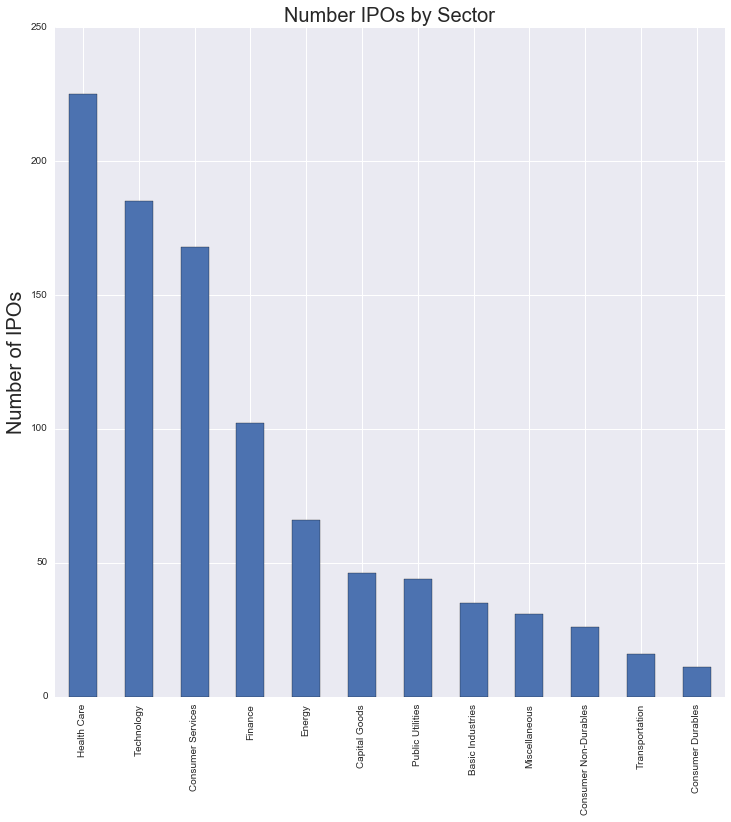

In [206]:
stocksdf.Industry.value_counts().plot(kind = "bar",figsize = (12,12))
plt.ylabel('Number of IPOs',fontsize=20)
plt.title('Number IPOs by Sector',fontsize=20)

In [248]:
stocksdf['Percent180'] = stocksdf['180days']*100/stocksdf['Offer Price']
stocksdf['Percent7'] = stocksdf['7days']*100/stocksdf['Offer Price']

In [251]:
stocksdf.head(50)

,Unnamed: 0,Name,Ticker,Underwriter,# Shares(M),IPO Year Close,Offer Price,Gain,IPO Date,Industry,...,30days,60days,90days,180days,Best2015,Best2014,Best2013,Best2012,Percent180,Percent7
0,0,Atlassian Corporation Plc,TEAM,Goldman Sachs,22.0,30.21,21.00,43.86%,12/10/15,Technology,...,27.120001,17.920000,21.770000,23.459999,0,0,0,0,111.714281,133.380952
1,1,"Duluth Holdings, Inc.",DLTH,William Blair,6.7,14.57,12.00,21.42%,11/20/15,Consumer Services,...,14.690000,14.080000,16.180000,22.059999,0,0,0,0,183.833325,118.416667
2,2,"Square, Inc.",SQ,Goldman Sachs,27.0,12.78,9.00,42.00%,11/19/15,Technology,...,12.240000,9.470000,9.840000,9.180000,0,0,0,0,102.000000,133.888889
3,3,Mimecast Ltd.,MIME,Goldman Sachs,7.8,9.64,10.00,-3.60%,11/19/15,Technology,...,9.890000,7.720000,9.490000,8.000000,0,0,0,0,80.000000,100.700000
4,4,"Match Group, Inc.",MTCH,J.P. Morgan,33.3,13.6,12.00,13.33%,11/19/15,Technology,...,13.900000,12.510000,10.110000,14.490000,0,0,0,0,120.750000,121.833333
5,5,"Axsome Therapeutics, Inc.",AXSM,Ladenburg Thalmann,5.7,9.2,9.00,2.22%,11/19/15,Health Care,...,9.050000,12.350000,8.210000,10.470000,0,0,0,0,116.333333,102.111111
6,6,"Xtera Communications, Inc.",XCOM,Needham & Company,5.0,4.21,5.00,-15.80%,11/13/15,Public Utilities,...,5.040000,3.990000,3.010000,2.290000,0,0,0,0,45.800000,110.600000
7,7,"Instructure, Inc.",INST,Morgan Stanley,4.4,20.92,16.00,30.75%,11/13/15,Technology,...,18.990000,20.760000,14.050000,18.299999,0,0,0,0,114.374994,112.937500
8,8,Advanced Accelerator Applications S.A.,AAAP,Citigroup,4.7,30.04,16.00,87.75%,11/11/15,Health Care,...,29.209999,26.790001,24.059999,33.880001,0,0,0,0,211.750006,156.250000
9,9,Wave Life Sciences Pte Ltd.,WVE,Jefferies,6.4,15.02,16.00,-6.13%,11/11/15,Health Care,...,13.790000,13.360000,11.110000,15.480000,0,0,0,0,96.750000,99.312500


In [253]:
stockspivot1= pd.pivot_table(stocksdf[stocksdf['Offer Price']!=0],values=['Percent180','Percent7'],index=['Industry'],aggfunc=np.mean)

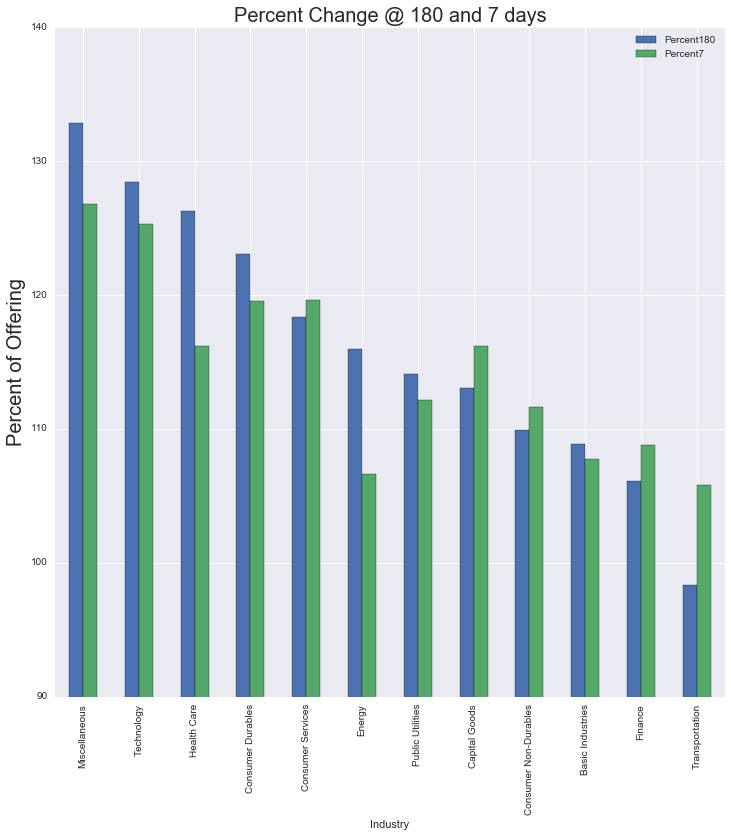

In [256]:
stockspivot1.sort_values(['Percent180'],ascending=False).plot(kind='bar',figsize =(12,12))
axes = plt.gca()
axes.set_ylim([90,140])
plt.ylabel('Percent of Offering',fontsize=20)
plt.title('Percent Change @ 180 and 7 days',fontsize=20)

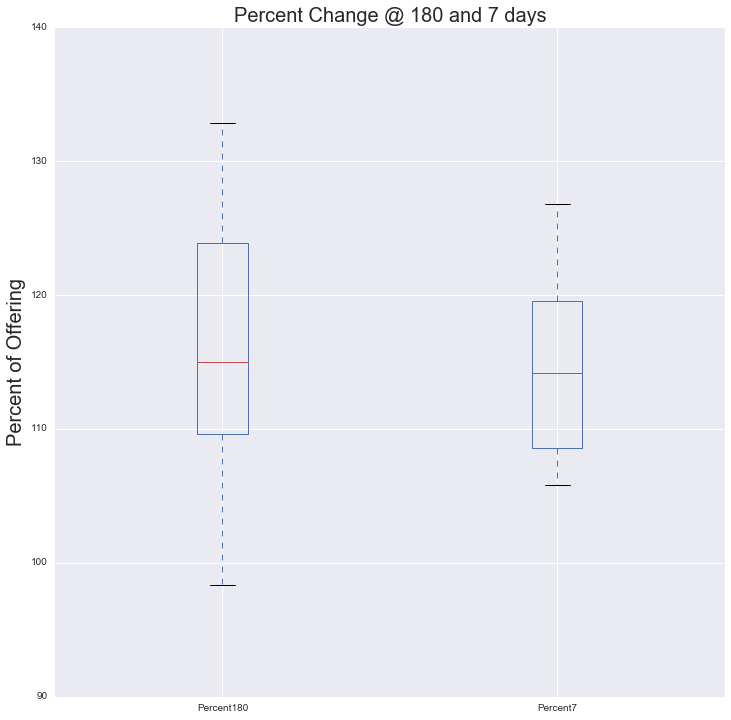

In [257]:
stockspivot1.sort_values(['Percent180'],ascending=False).plot(kind='box',figsize =(12,12))
axes = plt.gca()
axes.set_ylim([90,140])
plt.ylabel('Percent of Offering',fontsize=20)
plt.title('Percent Change @ 180 and 7 days',fontsize=20)

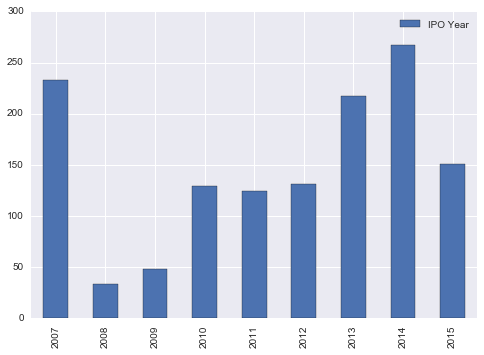

In [278]:
stocksdf['IPO Year'] = stocksdf['IPO Date'].apply(lambda x: pd.to_datetime(x).year)

stocksdf['IPO Year'].value_counts().to_frame().sort_index().plot(kind='bar')

In [281]:
stocksdf.Industry.unique()

array(['Technology', 'Consumer Services', 'Health Care',
       'Public Utilities', 'Finance', 'Consumer Non-Durables',
       'Consumer Durables', 'Capital Goods', 'Miscellaneous',
       'Basic Industries', 'Energy', 'Transportation', nan], dtype=object)

In [283]:
technology = stocksdf[stocksdf.Industry=='Technology']
consumerserv = stocksdf[stocksdf.Industry=='Consumer Services']
healthcare = stocksdf[stocksdf.Industry=='Health Care']
utilities = stocksdf[stocksdf.Industry=='Public Utilities']
finance = stocksdf[stocksdf.Industry=='Finance']
consumernondurable = stocksdf[stocksdf.Industry=='Consumer Non-Durables']
consumerdurables = stocksdf[stocksdf.Industry=='Consumer Durables']
capitalgoods = stocksdf[stocksdf.Industry=='Capital Goods']
misc = stocksdf[stocksdf.Industry=='Miscellaneous']
basicindustries = stocksdf[stocksdf.Industry=='Basic Industries']
energy = stocksdf[stocksdf.Industry=='Energy']
transportation = stocksdf[stocksdf.Industry=='Transportation']
other = stocksdf[stocksdf.Industry=='nan']

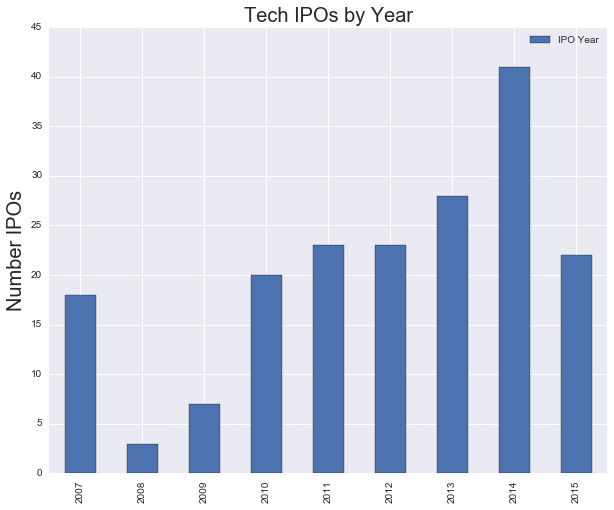

In [288]:
#tech stock IPOs by year
technology['IPO Year'].value_counts().to_frame().sort_index().plot(kind='bar', figsize = (10,8))
plt.ylabel('Number IPOs',fontsize=20)
plt.title('Tech IPOs by Year',fontsize=20)

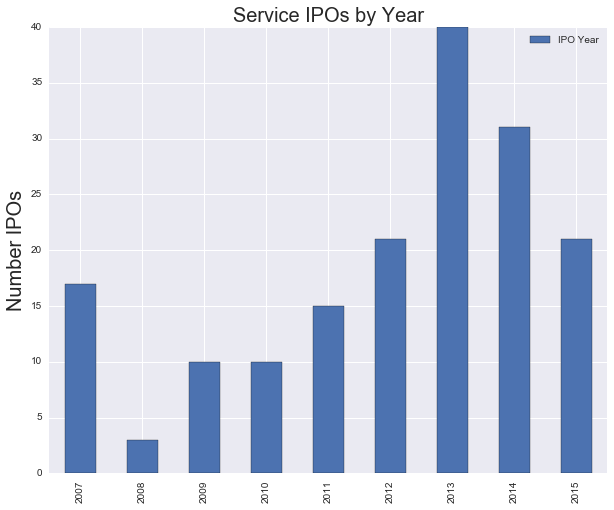

In [290]:
consumerserv['IPO Year'].value_counts().to_frame().sort_index().plot(kind='bar', figsize = (10,8))
plt.ylabel('Number IPOs',fontsize=20)
plt.title('Service IPOs by Year',fontsize=20)


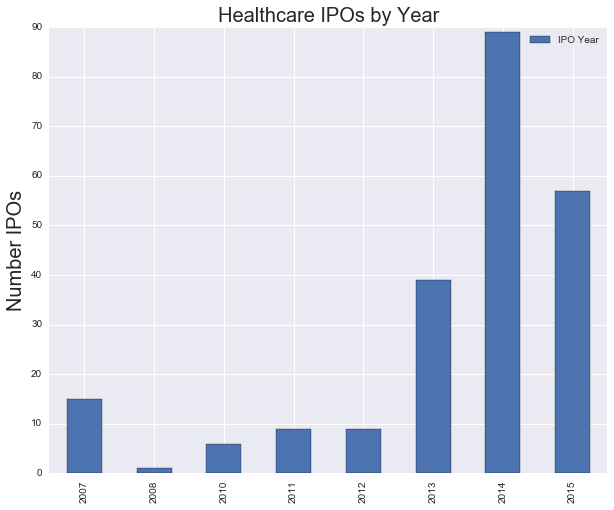

In [291]:
healthcare['IPO Year'].value_counts().to_frame().sort_index().plot(kind='bar', figsize = (10,8))
plt.ylabel('Number IPOs',fontsize=20)
plt.title('Healthcare IPOs by Year',fontsize=20)

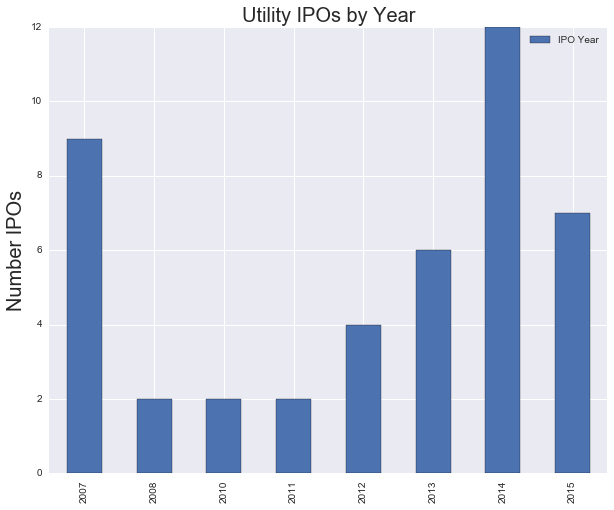

In [292]:
utilities['IPO Year'].value_counts().to_frame().sort_index().plot(kind='bar', figsize = (10,8))
plt.ylabel('Number IPOs',fontsize=20)
plt.title('Utility IPOs by Year',fontsize=20)

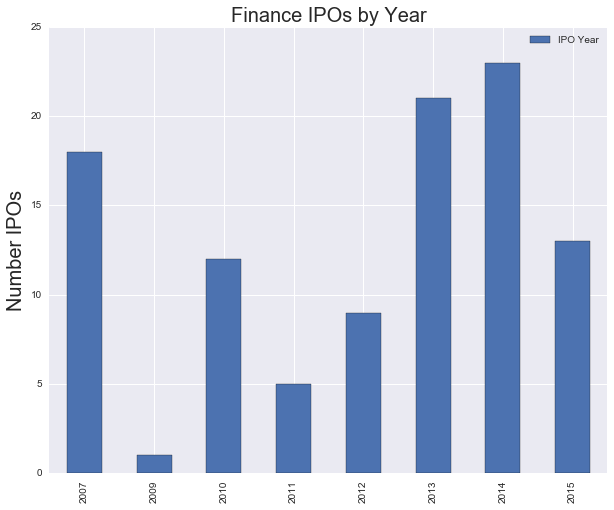

In [293]:
finance['IPO Year'].value_counts().to_frame().sort_index().plot(kind='bar', figsize = (10,8))
plt.ylabel('Number IPOs',fontsize=20)
plt.title('Finance IPOs by Year',fontsize=20)

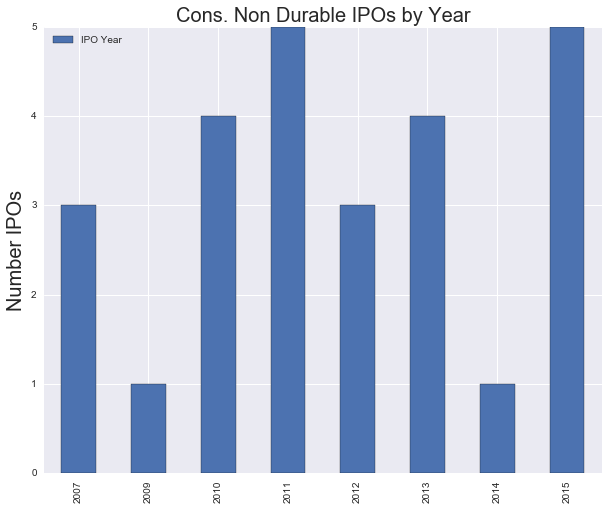

In [294]:
consumernondurable['IPO Year'].value_counts().to_frame().sort_index().plot(kind='bar', figsize = (10,8))
plt.ylabel('Number IPOs',fontsize=20)
plt.title('Cons. Non Durable IPOs by Year',fontsize=20)

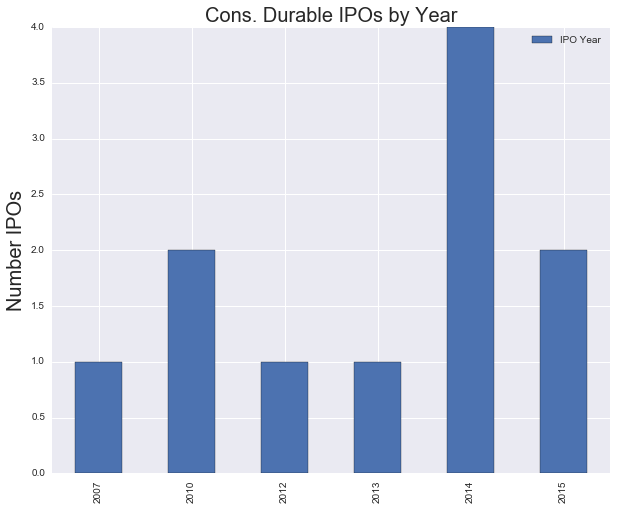

In [295]:
consumerdurables['IPO Year'].value_counts().to_frame().sort_index().plot(kind='bar', figsize = (10,8))
plt.ylabel('Number IPOs',fontsize=20)
plt.title('Cons. Durable IPOs by Year',fontsize=20)

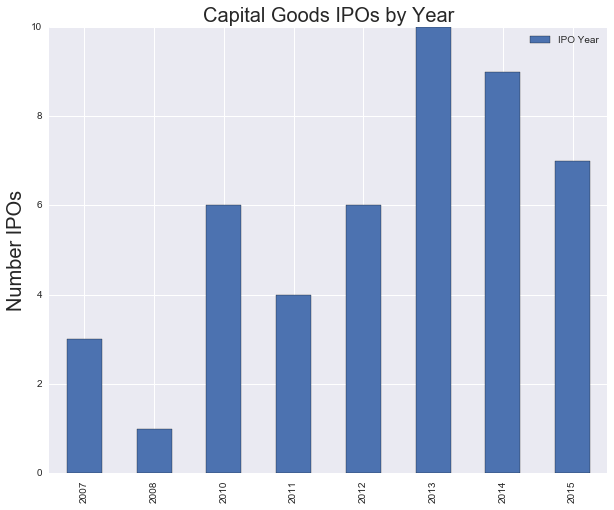

In [296]:
capitalgoods['IPO Year'].value_counts().to_frame().sort_index().plot(kind='bar', figsize = (10,8))
plt.ylabel('Number IPOs',fontsize=20)
plt.title('Capital Goods IPOs by Year',fontsize=20)

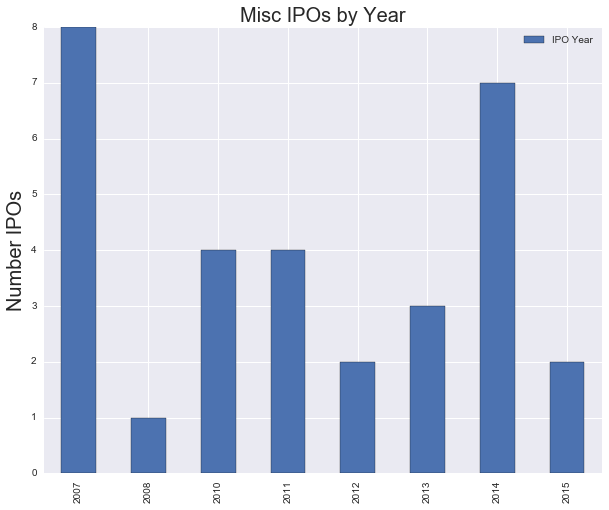

In [297]:
misc['IPO Year'].value_counts().to_frame().sort_index().plot(kind='bar', figsize = (10,8))
plt.ylabel('Number IPOs',fontsize=20)
plt.title('Misc IPOs by Year',fontsize=20)

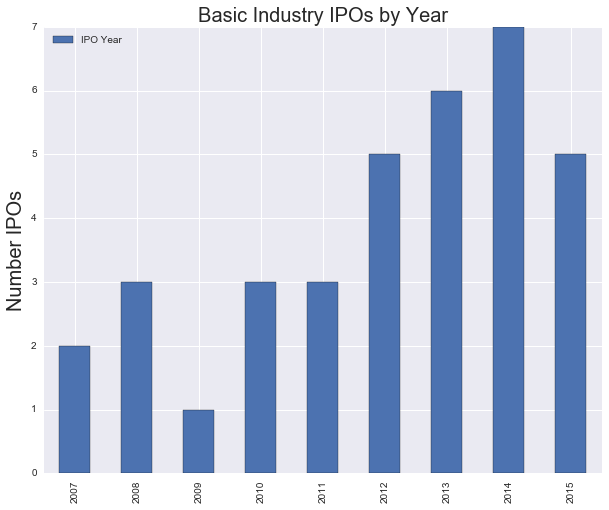

In [298]:
basicindustries['IPO Year'].value_counts().to_frame().sort_index().plot(kind='bar', figsize = (10,8))
plt.ylabel('Number IPOs',fontsize=20)
plt.title('Basic Industry IPOs by Year',fontsize=20)

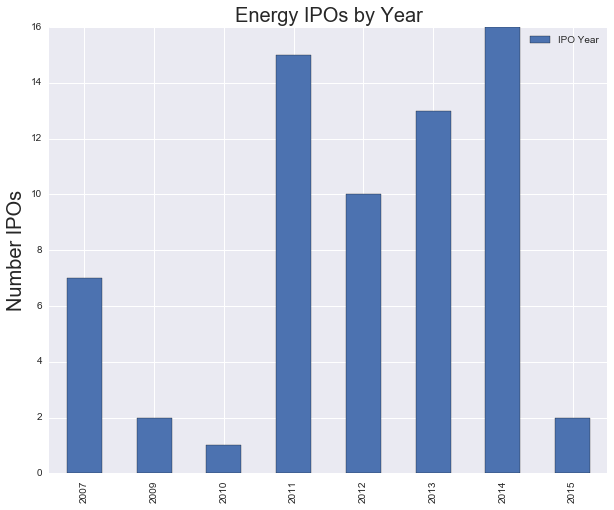

In [299]:
energy['IPO Year'].value_counts().to_frame().sort_index().plot(kind='bar', figsize = (10,8))
plt.ylabel('Number IPOs',fontsize=20)
plt.title('Energy IPOs by Year',fontsize=20)

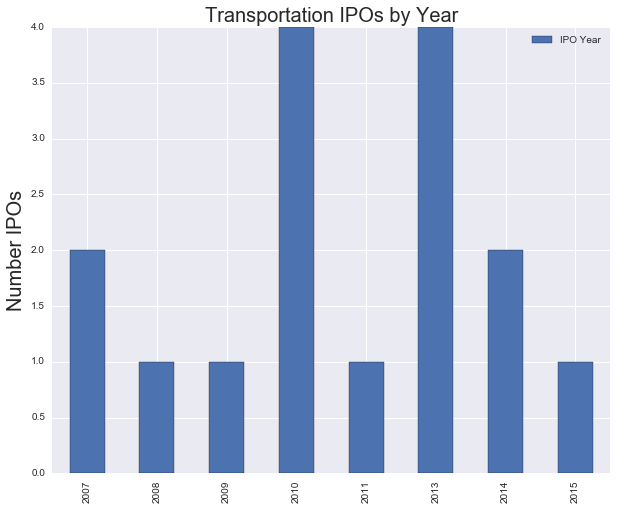

In [300]:
transportation['IPO Year'].value_counts().to_frame().sort_index().plot(kind='bar', figsize = (10,8))
plt.ylabel('Number IPOs',fontsize=20)
plt.title('Transportation IPOs by Year',fontsize=20)